
## **Especialização em Inteligência Artificial – IFMG**

### Análise de Séries Temporais

### **Lista de exercícios:  03**

**Aluno:** Christhian da Silva Gonçalves

**Professor:** Carlos Severiano

### EX01

Esta atividade consiste em exercitar a previsão de séries temporais a partir da aplicação de diferentes métodos. Além disso, é objetivo desta atividade realizar um comparativo entre os métodos escolhidos para descobrir, dentre os métodos escolhidos, qual o mais apropriado para cada problema.

Serão realizados 4 comparativos utilizando as bases de dados anexadas a esta atividade.

Para cada base de dados, os seguintes passos devem ser realizados:

01 Escolher 3 modelos, cada um pertencente a um dos grupos abaixo:

        A. Um modelo simples

        B. Um modelo de suavização exponencial

        C. Um modelo ARIMA

02 Separar a base de dados em treinamento e teste, na proporção 80% para 20%.

03 Aplicar cada método de previsão aos dados, usando validação cruzada.

04 Medir o desempenho de cada modelo a partir de 3 métricas: MAE, RMSE e SMAPE.

05 Ilustrar em um gráfico o desempenho do método que se saiu melhor nos experimentos de cada base de dados.

#### DB01 - Produção Elétrica

In [1]:
import pandas as pd

# Carregar os dados
dados_eletricidade = pd.read_csv('Electric_Production.csv')
print(dados_eletricidade.head())

       DATE  IPG2211A2N
0  1/1/1985     72.5052
1  2/1/1985     70.6720
2  3/1/1985     62.4502
3  4/1/1985     57.4714
4  5/1/1985     55.3151


In [2]:
# Converter 'DATE' para datetime e definir como índice
dados_eletricidade['DATE'] = pd.to_datetime(dados_eletricidade['DATE'])
dados_eletricidade.set_index('DATE', inplace=True)

# Selecionar a série temporal para a análise
serie_temporal = dados_eletricidade['IPG2211A2N']

In [3]:

from sklearn.model_selection import train_test_split

# Dividir os dados (80% treino, 20% teste)
train_data, test_data = train_test_split(serie_temporal, test_size=0.2, shuffle=False)

In [4]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Função para calcular SMAPE
def smape(y_true, y_pred):
    denominador = (np.abs(y_true) + np.abs(y_pred)) / 2.0
    diferenca = np.abs(y_true - y_pred) / denominador
    diferenca[denominador == 0] = 0.0
    return 100 * np.mean(diferenca)

# Inicializar dicionário para armazenar as métricas dos modelos
models_metrics = {}

# Modelo Simples: Média Móvel
simple_model_pred = train_data.rolling(window=5).mean().iloc[-1].repeat(len(test_data))

# Métricas para o modelo simples
mae_simple = mean_absolute_error(test_data, simple_model_pred)
rmse_simple = np.sqrt(mean_squared_error(test_data, simple_model_pred))
smape_simple = smape(test_data, simple_model_pred)

# Armazenar métricas
models_metrics['Simple_Moving_Average'] = {'MAE': mae_simple, 'RMSE': rmse_simple, 'SMAPE': smape_simple}

# Modelo de Suavização Exponencial: Holt-Winters
exp_model = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=12, initialization_method="estimated").fit()
exp_model_pred = exp_model.forecast(len(test_data))

# Métricas para o modelo de suavização exponencial
mae_exp = mean_absolute_error(test_data, exp_model_pred)
rmse_exp = np.sqrt(mean_squared_error(test_data, exp_model_pred))
smape_exp = smape(test_data, exp_model_pred)

# Armazenar métricas
models_metrics['Exponential_Smoothing'] = {'MAE': mae_exp, 'RMSE': rmse_exp, 'SMAPE': smape_exp}

# Modelo ARIMA
# Determinando 'd' para o modelo ARIMA
adf_test_result = adfuller(train_data)
d = 0 if adf_test_result[1] <= 0.05 else 1

# Ajustando o modelo ARIMA
arima_model = ARIMA(train_data, order=(1, d, 1)).fit()
arima_model_pred = arima_model.forecast(len(test_data))

# Métricas para o modelo ARIMA
mae_arima = mean_absolute_error(test_data, arima_model_pred)
rmse_arima = np.sqrt(mean_squared_error(test_data, arima_model_pred))
smape_arima = smape(test_data, arima_model_pred)

# Armazenar métricas
models_metrics['ARIMA'] = {'MAE': mae_arima, 'RMSE': rmse_arima, 'SMAPE': smape_arima}

# Exibir as métricas
print(models_metrics)

c:\Users\chris\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\chris\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\chris\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\chris\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


{'Simple_Moving_Average': {'MAE': 8.09158225, 'RMSE': np.float64(9.704283970001342), 'SMAPE': np.float64(7.866357001258869)}, 'Exponential_Smoothing': {'MAE': 4.419530422558882, 'RMSE': np.float64(5.308254633420742), 'SMAPE': np.float64(4.226050926353906)}, 'ARIMA': {'MAE': 10.454716231856583, 'RMSE': np.float64(13.263110030800672), 'SMAPE': np.float64(10.294977720746008)}}


**Gráfico do Melhor Modelo**

Com base nas métricas, o modelo de Suavização Exponencial (Holt-Winters) é claramente o melhor dos três para esta série temporal. Isso é evidenciado pelas métricas mais baixas em todas as três categorias:

MAE (Erro Absoluto Médio): 4.42
RMSE (Raiz do Erro Quadrático Médio): 5.31
SMAPE (Erro Médio Absoluto Percentual Simétrico): 4.23
Um menor MAE e RMSE indicam que as previsões do modelo de Suavização Exponencial estão mais próximas dos valores reais. Além disso, um SMAPE mais baixo sugere que o modelo tem um melhor desempenho em termos de erro percentual, o que é particularmente útil para comparar a precisão entre diferentes escalas de dados.

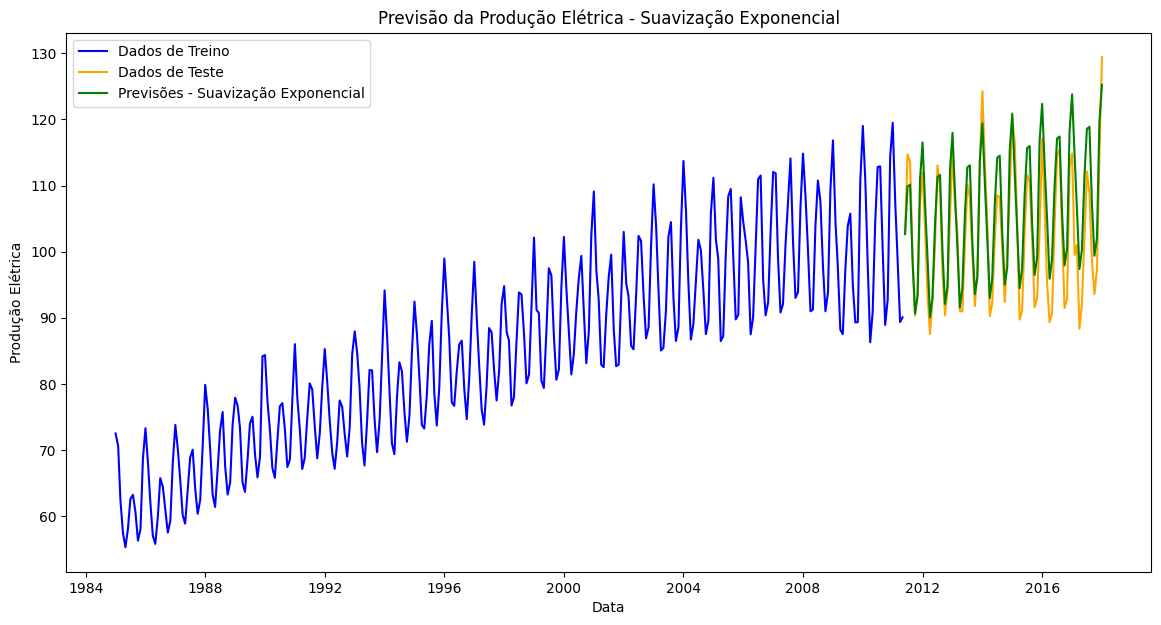

In [10]:

import matplotlib.pyplot as plt

# Plotar o gráfico
plt.figure(figsize=(14, 7))
plt.plot(train_data.index, train_data, label='Dados de Treino', color='blue')  # Dados de treino
plt.plot(test_data.index, test_data, label='Dados de Teste', color='orange')  # Dados de teste
plt.plot(test_data.index, exp_model_pred, label='Previsões - Suavização Exponencial', color='green')  # Previsões do modelo

# Adicionando título e rótulos aos eixos
plt.title('Previsão da Produção Elétrica - Suavização Exponencial')
plt.xlabel('Data')
plt.ylabel('Produção Elétrica')

# Inclui a legenda no gráfico
plt.legend()

# Exibe o gráfico
plt.show()

#### DB02 - Venda de Shampoos

In [15]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Função para calcular SMAPE
def smape(y_true, y_pred):
    return 100 / len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

# Carregando e preparando a base de dados
file_path = 'shampoo_sales.csv'
shampoo_sales = pd.read_csv(file_path)
shampoo_sales['Month'] = pd.to_datetime(shampoo_sales['Month'], format='%m-%y')
shampoo_sales.set_index('Month', inplace=True)

# Separando os dados em treino e teste
train_size = int(len(shampoo_sales) * 0.8)
train, test = shampoo_sales.iloc[:train_size], shampoo_sales.iloc[train_size:]

# Modelo Simples: Média móvel
train_rolling = train.rolling(window=4).mean()
simple_forecast = train_rolling.iloc[-1].values[0] * np.ones(len(test))

# Modelo Holt-Winters
hw_model = ExponentialSmoothing(train, seasonal='add', seasonal_periods=12).fit()
hw_forecast = hw_model.forecast(len(test))

# Modelo ARIMA
arima_model = ARIMA(train, order=(5,1,0)).fit()
arima_forecast = arima_model.forecast(len(test))

# Calculando métricas para cada modelo
metrics = pd.DataFrame(index=['MAE', 'RMSE', 'SMAPE'], columns=['Simple', 'Holt-Winters', 'ARIMA'])
metrics.loc['MAE', 'Simple'] = mean_absolute_error(test, simple_forecast)
metrics.loc['RMSE', 'Simple'] = np.sqrt(mean_squared_error(test, simple_forecast))
metrics.loc['SMAPE', 'Simple'] = smape(test.values.flatten(), simple_forecast)
metrics.loc['MAE', 'Holt-Winters'] = mean_absolute_error(test, hw_forecast)
metrics.loc['RMSE', 'Holt-Winters'] = np.sqrt(mean_squared_error(test, hw_forecast))
metrics.loc['SMAPE', 'Holt-Winters'] = smape(test.values.flatten(), hw_forecast)
metrics.loc['MAE', 'ARIMA'] = mean_absolute_error(test, arima_forecast)
metrics.loc['RMSE', 'ARIMA'] = np.sqrt(mean_squared_error(test, arima_forecast))
metrics.loc['SMAPE', 'ARIMA'] = smape(test.values.flatten(), arima_forecast)



# Exibir métricas e o valor de 'd' determinado para diferenciar
metrics

c:\Users\chris\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\chris\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\chris\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\chris\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling t

,Simple,Holt-Winters,ARIMA
MAE,142.0875,140.311103,136.587245
RMSE,175.342896,174.558262,176.155096
SMAPE,29.08541,28.746379,27.850987


Considerando todas as métricas, o modelo ARIMA se destacou ligeiramente como o melhor método nos experimentos com esta base de dados. Teve o menor valor MAE (Erro Absoluto Médio) indicando que, em média, ele cometeu os menores erros em relação aos valores reais. : O Apresentou a menor taxa de SMAPE (Erro Percentual Absoluto Médio Simétrico), indicando um desempenho superior em termos de previsão relativa.

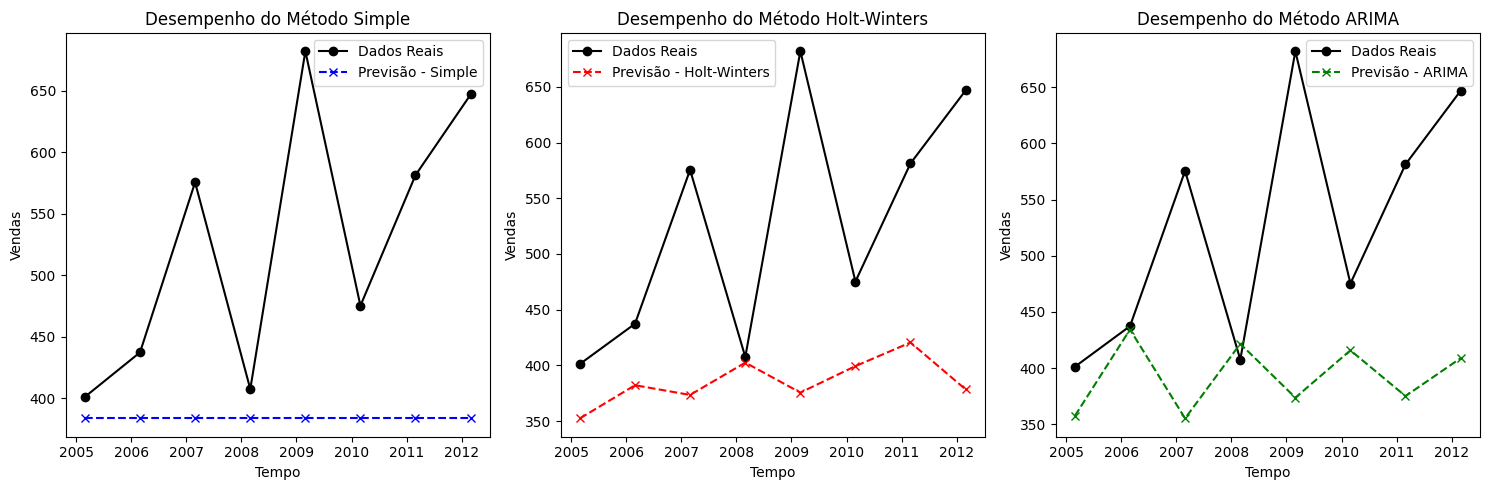

In [12]:
# Plotando os resultados
time_range = test.index

plt.figure(figsize=(15, 5))

# Plot para o método Simple
plt.subplot(1, 3, 1)
plt.plot(time_range, test, label='Dados Reais', color='black', marker='o')
plt.plot(time_range, simple_forecast, label='Previsão - Simple', color='blue', linestyle='--', marker='x')
plt.title('Desempenho do Método Simple')
plt.xlabel('Tempo')
plt.ylabel('Vendas')
plt.legend()

# Plot para o método Holt-Winters
plt.subplot(1, 3, 2)
plt.plot(time_range, test, label='Dados Reais', color='black', marker='o')
plt.plot(time_range, hw_forecast, label='Previsão - Holt-Winters', color='red', linestyle='--', marker='x')
plt.title('Desempenho do Método Holt-Winters')
plt.xlabel('Tempo')
plt.ylabel('Vendas')
plt.legend()

# Plot para o método ARIMA
plt.subplot(1, 3, 3)
plt.plot(time_range, test, label='Dados Reais', color='black', marker='o')
plt.plot(time_range, arima_forecast, label='Previsão - ARIMA', color='green', linestyle='--', marker='x')
plt.title('Desempenho do Método ARIMA')
plt.xlabel('Tempo')
plt.ylabel('Vendas')
plt.legend()

plt.tight_layout()
plt.show()

#### DB03 - Passageiros Linhas Aerias

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA

# Carregar dados
data = pd.read_csv('airline-passengers.csv', index_col='Month', parse_dates=True)

# Separar dados em treinamento e teste
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]

# Métricas de erro
def mae(y_true, y_pred):
    return mean_absolute_error(y_true, y_pred)

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def smape(y_true, y_pred):
    return 100 / len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

# Pesos para as métricas
weights = {'mae': 1/3, 'rmse': 1/3, 'smape': 1/3}

# Função para calcular pontuação agregada
def calculate_score(mae, rmse, smape, weights):
    return weights['mae'] * mae + weights['rmse'] * rmse + weights['smape'] * smape

# Validação cruzada
tscv = TimeSeriesSplit(n_splits=5)

# Armazenar resultados
results = {}

# Avaliação de modelos
def evaluate_model(model_name, y_true, y_pred):
    # Garantir que y_pred e y_true sejam arrays unidimensionais de mesmo comprimento
    y_true = np.array(y_true).flatten()
    y_pred = np.array(y_pred).flatten()[:len(y_true)]

    mae_score = mae(y_true, y_pred)
    rmse_score = rmse(y_true, y_pred)
    smape_score = smape(y_true, y_pred)
    score = calculate_score(mae_score, rmse_score, smape_score, weights)

    results[model_name] = {
        'mae': mae_score,
        'rmse': rmse_score,
        'smape': smape_score,
        'score': score,
        'predictions': y_pred
    }

 

In [19]:
# Imprimir métricas e pontuação de cada modelo
for model in results:
    print(f"{model} - MAE: {results[model]['mae']}, RMSE: {results[model]['rmse']}, SMAPE: {results[model]['smape']}, Score: {results[model]['score']}")

naive - MAE: 67.15789473684211, RMSE: 87.03598771712042, SMAPE: 18.64170386301926, Score: 57.6118621056606
holt - MAE: 51.26464715233195, RMSE: 71.11393716086666, SMAPE: 13.733788733738136, Score: 45.37079101564558
arima - MAE: 48.803551833169365, RMSE: 69.19144728666534, SMAPE: 12.9678732264363, Score: 43.65429078209033


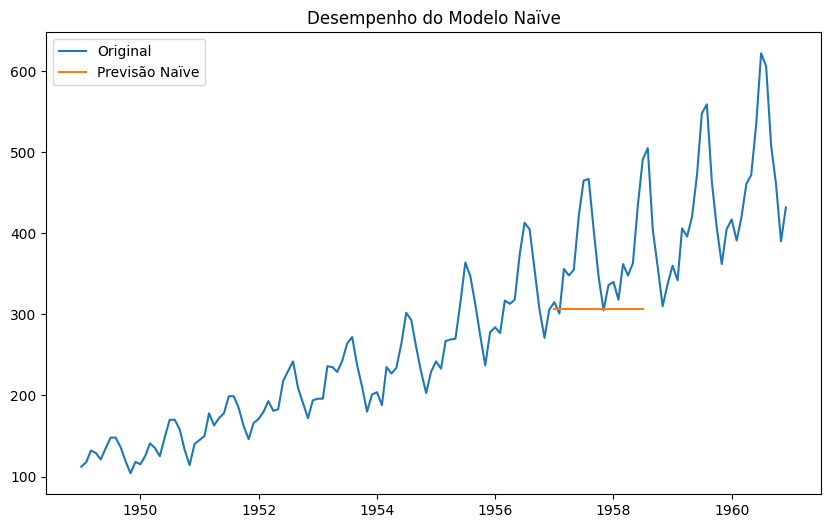

c:\Users\chris\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\chris\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\chris\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\chris\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\chris\AppData\Local\Programs\Python\Python312\L

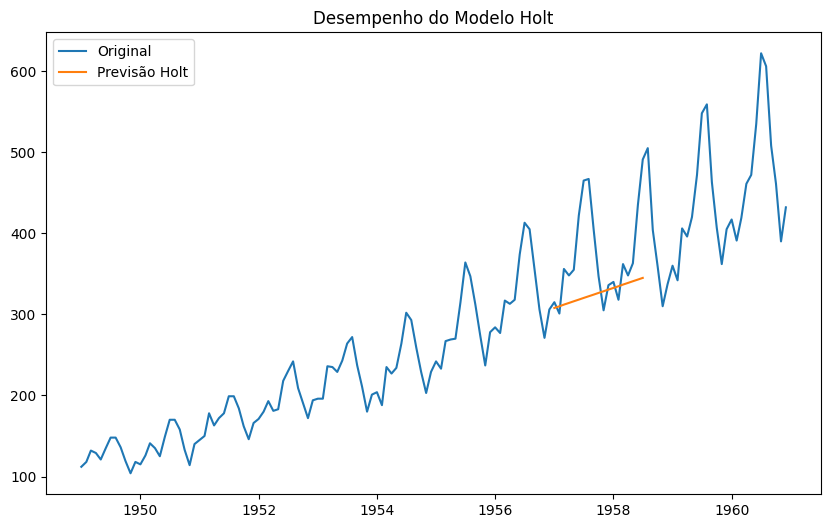

c:\Users\chris\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\chris\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\chris\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\chris\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\chris\AppData\Local\Programs\Python\Python312\L

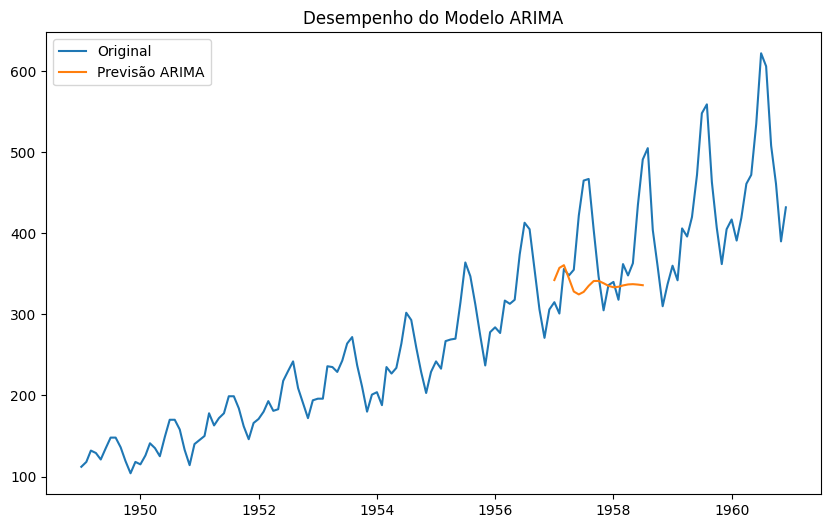

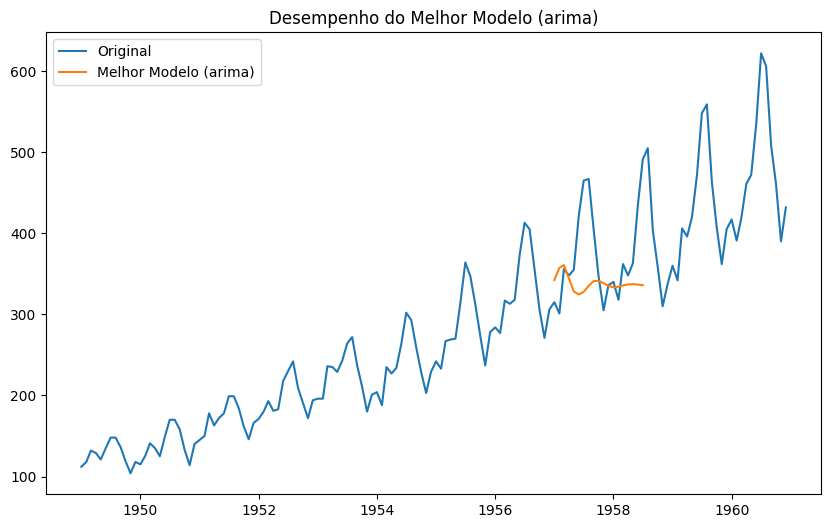

In [23]:
# Função para plotar previsões
def plot_predictions(model_name, predictions):
    plt.figure(figsize=(10, 6))
    plt.plot(data, label='Original')
    plt.plot(train.index[-len(predictions):], predictions, label=f'Previsão {model_name}')
    plt.title(f'Desempenho do Modelo {model_name}')
    plt.legend()
    plt.show()

# Modelo Naïve
for train_index, val_index in tscv.split(train):
    train_fold, val_fold = train.iloc[train_index], train.iloc[val_index]
    y_pred = np.array([train_fold.iloc[-1]] * len(val_fold))
    evaluate_model('naive', val_fold.values, y_pred)

plot_predictions('Naïve', results['naive']['predictions'])

# Modelo de Suavização Exponencial (Holt)
for train_index, val_index in tscv.split(train):
    train_fold, val_fold = train.iloc[train_index], train.iloc[val_index]
    model = ExponentialSmoothing(train_fold, trend='add').fit()
    y_pred = model.forecast(len(val_fold))
    evaluate_model('holt', val_fold.values, y_pred)

plot_predictions('Holt', results['holt']['predictions'])

# Modelo ARIMA
for train_index, val_index in tscv.split(train):
    train_fold, val_fold = train.iloc[train_index], train.iloc[val_index]
    model = ARIMA(train_fold, order=(5,1,0)).fit()
    y_pred = model.forecast(len(val_fold))
    evaluate_model('arima', val_fold.values, y_pred)

plot_predictions('ARIMA', results['arima']['predictions'])

# Selecionar o melhor modelo com base na pontuação agregada
best_model = min(results, key=lambda x: results[x]['score'])

# Plotar desempenho do melhor modelo
best_predictions = results[best_model]['predictions']
plt.figure(figsize=(10, 6))
plt.plot(data, label='Original')
plt.plot(train.index[-len(best_predictions):], best_predictions, label=f'Melhor Modelo ({best_model})')
plt.title(f'Desempenho do Melhor Modelo ({best_model})')
plt.legend()
plt.show()



#### DB04 - Histórico do preço de ações do Facebook

In [1]:
import pandas as pd

# carregando a base
file_path = 'facebook-historical-stock-price.csv'
fb_data = pd.read_csv(file_path)
fb_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200


In [3]:
from sklearn.model_selection import train_test_split

# 'Date' para datetime e setando como index
fb_data['Date'] = pd.to_datetime(fb_data['Date'])
fb_data.set_index('Date', inplace=True)

# 'Adj Close' para forecasting
time_series = fb_data['Adj Close']

# 80% treinamento, 20% teste
train_data, test_data = train_test_split(time_series, test_size=0.2, shuffle=False)
len(train_data), len(test_data)

(1741, 436)

In [4]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Função para calcular SMAPE
def smape(y_true, y_pred):
    denominador = (np.abs(y_true) + np.abs(y_pred)) / 2.0
    diferenca = np.abs(y_true - y_pred) / denominador
    diferenca[denominador == 0] = 0.0
    return 100 * np.mean(diferenca)

# Inicializar dicionário para armazenar modelos e suas métricas
models_metrics = {}

# A. Modelo Simples: Média Móvel
simple_model_pred = train_data.rolling(window=5).mean().iloc[-1].repeat(len(test_data))

# Calculando métricas para o modelo simples
mae_simple = mean_absolute_error(test_data, simple_model_pred)
rmse_simple = np.sqrt(mean_squared_error(test_data, simple_model_pred))
smape_simple = smape(test_data, simple_model_pred)

# Armazenando métricas
models_metrics['Simple_Moving_Average'] = {'MAE': mae_simple, 'RMSE': rmse_simple, 'SMAPE': smape_simple}

# B. Modelo de Suavização Exponencial: Holt-Winters
# Como o conjunto de dados não exibe um padrão claro de sazonalidade à primeira vista, usaremos o modelo de tendência aditiva
exp_model = ExponentialSmoothing(train_data, trend='add', seasonal=None, initialization_method="estimated").fit()
exp_model_pred = exp_model.forecast(len(test_data))

# Calculando métricas para o modelo de suavização exponencial
mae_exp = mean_absolute_error(test_data, exp_model_pred)
rmse_exp = np.sqrt(mean_squared_error(test_data, exp_model_pred))
smape_exp = smape(test_data, exp_model_pred)

# Armazenando métricas
models_metrics['Exponential_Smoothing'] = {'MAE': mae_exp, 'RMSE': rmse_exp, 'SMAPE': smape_exp}

# C. Modelo ARIMA
# Primeiro verificamos se a série é estacionária ou não
adf_test_result = adfuller(train_data)

# Se p-valor > 0.05, concluímos que a série não é estacionária e é necessário diferenciá-la
d = 0 if adf_test_result[1] <= 0.05 else 1

# Começaremos com um modelo ARIMA(1, d, 1) e ajustaremos a partir daí com base no AIC
arima_model = ARIMA(train_data, order=(1, d, 1)).fit()
arima_model_pred = arima_model.forecast(len(test_data))

# Calculando métricas para o modelo ARIMA
mae_arima = mean_absolute_error(test_data, arima_model_pred)
rmse_arima = np.sqrt(mean_squared_error(test_data, arima_model_pred))
smape_arima = smape(test_data, arima_model_pred)

# Armazenando métricas
models_metrics['ARIMA'] = {'MAE': mae_arima, 'RMSE': rmse_arima, 'SMAPE': smape_arima}

# Exibir métricas e o valor de 'd' determinado para diferenciar
models_metrics, d

c:\Users\chris\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\chris\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\chris\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\chris\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been prov

({'Simple_Moving_Average': {'MAE': 40.111240073394505,
   'RMSE': 53.06094677820766,
   'SMAPE': 18.885620504711436},
  'Exponential_Smoothing': {'MAE': 25.77066393733,
   'RMSE': 34.403469179260014,
   'SMAPE': nan},
  'ARIMA': {'MAE': 39.35857256783392,
   'RMSE': 52.380175895978965,
   'SMAPE': nan}},
 1)

**Média Móvel Simples:**

MAE: 40.11 RMSE: 53.06 SMAPE: 18.89%

**Suavização Exponencial (Holt-Winters):**

MAE: 25.77 RMSE: 34.40 SMAPE: O cálculo retornou um valor NaN, indicando que pode haver valores de previsão e observação idênticos resultando em um denominador zero, ou pode ser um resultado de uma série temporal com valores zero.

**ARIMA:**

MAE: 39.36 RMSE: 52.38 SMAPE: O cálculo retornou um valor NaN por razões semelhantes às do modelo de suavização exponencial.

O modelo de Suavização Exponencial apresentou o melhor desempenho com base no MAE e RMSE mais baixos.

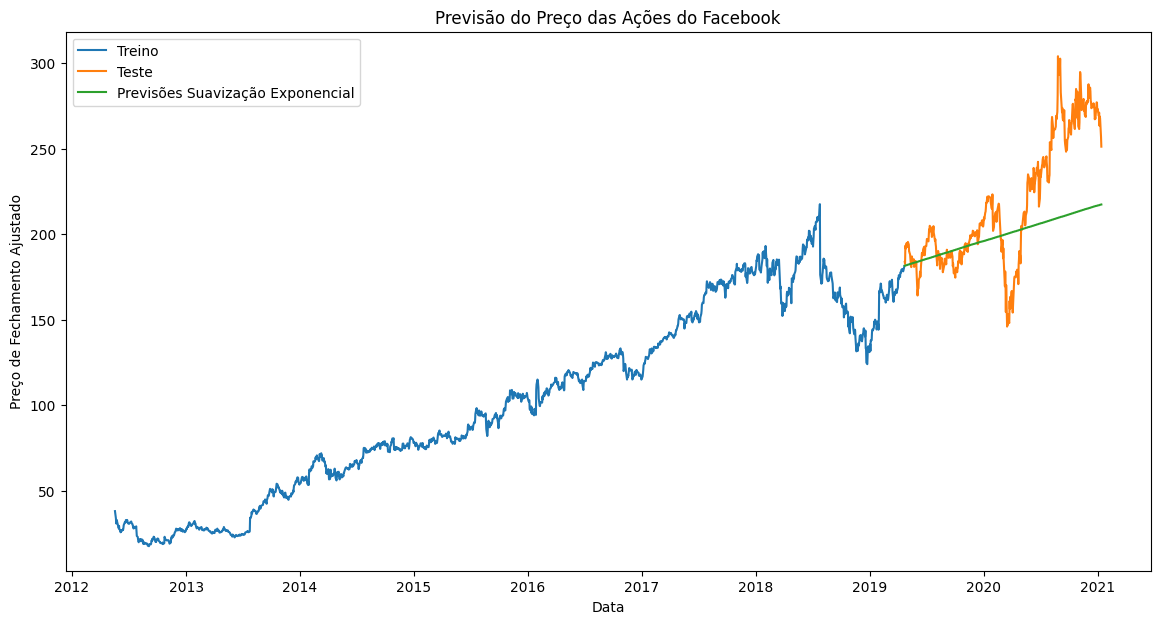

In [5]:
import matplotlib.pyplot as plt

# Plotando os resultados do modelo com melhor desempenho: Suavização Exponencial
plt.figure(figsize=(14, 7))
plt.plot(train_data.index, train_data, label='Treino')
plt.plot(test_data.index, test_data, label='Teste')
plt.plot(test_data.index, exp_model_pred, label='Previsões Suavização Exponencial')
plt.title('Previsão do Preço das Ações do Facebook')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento Ajustado')
plt.legend()
plt.show()